In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# dla srodowiska nie jupyter notebook komentujemy %matplotlib inline sluzy ona tylko do wyswietlenia wykresow
%matplotlib inline

In [74]:
def przynaleznosc_t(a, b, c, start, step, size):
    # x - domain values
    # y - przynaleznosc 
    x = np.zeros(size)
    x_val = start
    y = np.zeros(x.shape)
    for i in range(size):
        x[i] = x_val
        if a < x_val <= b:
            y[i] = np.round((x_val-a)/(b-a), 2)
        elif b < x_val <= c:        
            y[i] = np.round((c-x_val)/(c-b), 2)
        x_val += step
    return x, y

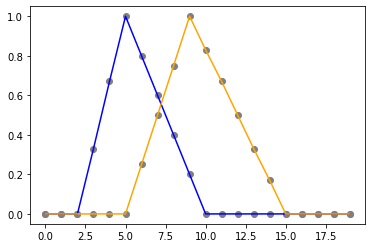

In [75]:
xA, yA = przynaleznosc_t(2, 5, 10, 0, 1, 20)
xB, yB = przynaleznosc_t(5, 9, 15, 0, 1, 20)
plt.scatter(xA, yA, color="grey")
plt.plot(xA, yA, color="blue")
plt.scatter(xB, yB, color="grey")
plt.plot(xB, yB, color="orange")
# ponizszy wykres reprezentuje wykresy A1_1 i A1_2 na slajdzie 9 pdf-a do zadania

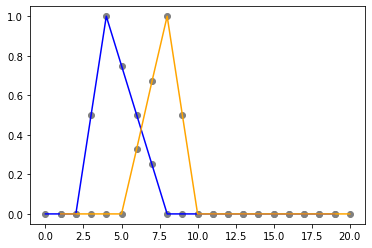

In [92]:
# ponizszy wykres reprezentuje wykresy A2_1 i A2_2 na slajdzie 9 pdf-a do zadania
ii_xA, ii_yA = przynaleznosc_t(2, 4, 8, 0, 1, 20)
ii_xB, ii_yB = przynaleznosc_t(5, 8, 10, 1, 1, 20)
plt.scatter(ii_xA, ii_yA, color="grey")
plt.plot(ii_xA, ii_yA, color="blue")
plt.scatter(ii_xB, ii_yB, color="grey")
plt.plot(ii_xB, ii_yB, color="orange")

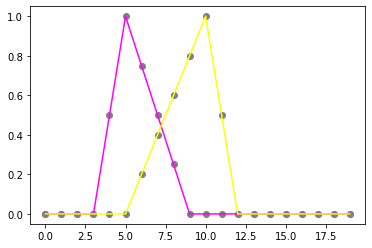

In [97]:
# rysuje B1 (magenta) i B2 (zolty)
B_x, B_y = przynaleznosc_t(3, 5, 9, 0, 1, 20)
plt.scatter(B_x, B_y, color="grey")
plt.plot(B_x, B_y, color="magenta")
B2_x, B2_y = przynaleznosc_t(5, 10, 12, 0, 1, 20)
plt.scatter(B2_x, B2_y, color="grey")
plt.plot(B2_x, B2_y, color="yellow")

In [98]:
# slajd 9 - wybieranie x1, x2 do okreslania minmum

x1 = 7
y_val_1 = yA[np.where(xA == x1)][0]
y_val_2 = ii_yA[np.where(ii_xA == x1)][0]

x2 = 7
y_val1 = yB[np.where(xB == x2)][0]
y_val2 = ii_yB[np.where(ii_xB == x2)][0]

min_B1 = min(y_val_1, y_val_2)
min_B2 = min(y_val1, y_val2)

In [99]:
# obliczanie splaszczonych b
def splaszczanie(x, y_in, _min):
    y_out = []
    shift = 0
    for y in y_in:
        if y <= _min:
            y_out.append(y)
            shift = y
        else:
            y_out.append(shift)
    return x, y_out
        

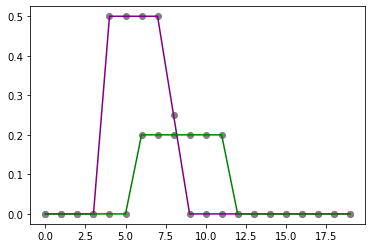

In [100]:
# rysowanie B
bb_x, bb_y = splaszczanie(B_x, B_y, min_B2)
b_xx, b_yy = splaszczanie(B2_x, B2_y, min_B1)
plt.scatter(bb_x, bb_y, color="grey")
plt.plot(bb_x, bb_y, color="purple")
plt.scatter(b_xx, b_yy, color="grey")
plt.plot(b_xx, b_yy, color="green")

In [170]:
# blok wyostrzania
def wyostrzanie(bb_x, bb_y, b_xx, b_yy):
    if not isinstance(bb_x, list): bb_x = bb_x.tolist()
    if not isinstance(bb_y, list): bb_y = bb_y.tolist()
    if not isinstance(b_xx, list): b_xx = b_xx.tolist()
    if not isinstance(b_yy, list): b_yy = b_yy.tolist()
    x, y = [], []
    _x = 0
    for b1, b2 in zip(bb_x, b_xx):
        if _x == b1 and _x == b2:
            x.append(_x)
            if bb_y[_x] > b_yy[_x]:
                y.append(bb_y[_x])
            else:
                y.append(b_yy[_x])
        elif _x == b1 and _x != b2:
            x.append(_x)
            y.append(bb_y[_x])
        elif _x != b1 and _x == b2:
            x.append(_x)
            y.append(b_yy[_x])
        _x += 1
    return x, y
    

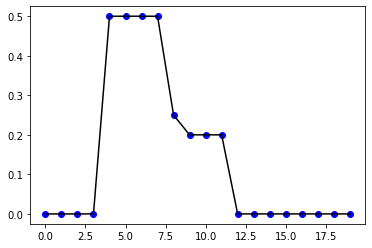

In [175]:
res_x, res_y = wyostrzanie(bb_x, bb_y, b_xx, b_yy)
plt.scatter(res_x, res_y, color="blue")
plt.plot(res_x, res_y, color="black")

In [177]:
# srodek ciezkosci
sr = sum([ y * res_x[i] for i, y in enumerate(res_y)])/sum(res_y)
sr

6.666666666666665